<a href="https://colab.research.google.com/github/Jeze2/Machine_learning_price_and_income/blob/main/Prediction_of_wine_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import required packages
import pandas as pd
fpath = "/content/drive/MyDrive/StudentFolders16wk20wk/CodingDojo (1)/02-MachineLearning/Week07/Data/wines_SPA.csv"
df = pd.read_csv(fpath)



In [3]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


1. Source of data
- The was collected by me using web scraping from different sources (from wine specialized pages to supermarkets)
2. Brief description of data
- This dataset is related to red variants of spanish wines. The dataset describes several popularity and description metrics their effect on it's quality.
3. What is the target?
- The target would be the price
4. What does one row represent? (A person? A business? An event? A product?)
- It represents the product which is the wine
5. Is this a classification or regression problem?
- This appears to be a regression problem rather than a classification problem.
The target variable we are trying to predict is 'price', which is a continuous numerical value.  because we are trying to predict the continuous target variable 'price' based on other numeric features, this is a regression problem
6. How many features does the data have?
- The data has 11 features
7. How many rows are in the dataset?
- 7499
8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?
- Missing or incomplete data: The dataset may contain missing values or incomplete entries, which could require data cleaning techniques such as imputation or removal of incomplete records.
- Class imbalance: The dataset mentions that the classes (quality ratings) are ordered and not balanced. This means there may be an unequal distribution of samples across different quality ratings.

## Converting Data types

In [5]:
#Dropping NA values
df.dropna(inplace=True)

In [6]:
#Replacing N.V. with -1
df['year'] = df['year'].replace('N.V.', '-1')

In [7]:
#changing datatype
df["year"] = df["year"].astype(int)

In [8]:
df['year'].dtypes


dtype('int64')

In [9]:
# Use .select_dtypes to view only object columns
df.select_dtypes

<bound method DataFrame.select_dtypes of                     winery             wine  year  rating  num_reviews  \
0            Teso La Monja            Tinto  2013     4.9           58   
1                   Artadi    Vina El Pison  2018     4.9           31   
2             Vega Sicilia            Unico  2009     4.8         1793   
3             Vega Sicilia            Unico  1999     4.8         1705   
4             Vega Sicilia            Unico  1996     4.8         1309   
...                    ...              ...   ...     ...          ...   
7495               Contino          Reserva  2016     4.2          392   
7496  Conreria d'Scala Dei    Les Brugueres  2018     4.2          390   
7497           Mustiguillo  Finca Terrerazo  2017     4.2          390   
7498           Matarromera     Gran Reserva  2011     4.2          389   
7499              Sei Solo         Preludio  2016     4.2          388   

     country            region   price                  type  body  ac

## Drop Unwanted Columns

In [10]:
# Dropping unnecessary columns
df.drop(df.columns [[0,1,4,5,6]], axis=1, inplace = True)
df.head()

,year,rating,price,type,body,acidity
0,2013,4.9,995.00,Toro Red,5.0,3.0
1,2018,4.9,313.50,Tempranillo,4.0,2.0
2,2009,4.8,324.95,Ribera Del Duero Red,5.0,3.0
3,1999,4.8,692.96,Ribera Del Duero Red,5.0,3.0
4,1996,4.8,778.06,Ribera Del Duero Red,5.0,3.0


## Duplicate Rows

In [11]:
# Save a filter called "duplicated_rows" that identifies duplicated rows

duplicated_rows = df.duplicated()
# Get the sum of duplicated_rows filter to see the number of duplicate rows

df.duplicated().sum()

4566

In [12]:
# Save a new filter called "duplicated_rows_all" that identifies ALL
# of the duplicated rows
duplicated_rows_all = df.duplicated(keep=False)

# Calculate the sum of the duplicated_rows_all filter
duplicated_rows_all.sum()

4602

In [13]:
# Drop duplicates
df = df.drop_duplicates()

# Obtain the sum of duplicated to confirm all have been dropped
df.duplicated().sum()

0

##Missing Values

In [14]:
# Get the number of null values for all columns and save as a variable
df.isna().sum()

year       0
rating     0
price      0
type       0
body       0
acidity    0
dtype: int64

In [15]:
# save list of categorical column name.
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['type'], dtype='object')

In [16]:
# use the list of cat columns to fill null values with MISSING

df[cat_cols] = df[cat_cols].fillna("MISSING")
df[cat_cols].isna().sum()

<ipython-input-16-1932a9b6fd82>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cat_cols] = df[cat_cols].fillna("MISSING")


type    0
dtype: int64

In [17]:
# save list of numeric column names
num_cols = df.select_dtypes('number').columns
num_cols

Index(['year', 'rating', 'price', 'body', 'acidity'], dtype='object')

In [18]:
# use the list of num columns to fill null values with -1
df[num_cols] = df[num_cols].fillna("-1")
df[num_cols].isna().sum()

<ipython-input-18-8bf2b48fc29f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[num_cols] = df[num_cols].fillna("-1")


year       0
rating     0
price      0
body       0
acidity    0
dtype: int64

##  Consistent Values

In [19]:
 #Save a list of object columns
cat_cols = df.select_dtypes('object').columns

In [20]:
# Remake the list of string columns
cat_cols = df.select_dtypes('object').columns

# loop through the list of string columns

  # print the value counts for the column

  # Print an empty line for readability
for col in cat_cols:
  print(f"Value Counts for {col}")
  print(df[col].value_counts())

  print('\n')

Value Counts for type
Ribera Del Duero Red    481
Rioja Red               407
Priorat Red             224
Red                     192
Tempranillo              69
Toro Red                 63
Sherry                   53
Pedro Ximenez            35
Rioja White              35
Grenache                 32
Cava                     29
Albarino                 27
Verdejo                  26
Monastrell               17
Mencia                   15
Montsant Red             14
Syrah                    13
Chardonnay               13
Cabernet Sauvignon       10
Sparkling                 5
Sauvignon Blanc           3
Name: type, dtype: int64




## Visualizations

In [21]:
"""UNIVARIATE PLOTTING FUNCTIONS FOR EDA"""
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


# TO DO: add the new print statements from explore_categorical
def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


In [22]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='rating',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='rating',
                           figsize=(6,4),
                           ):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Wine Prices')

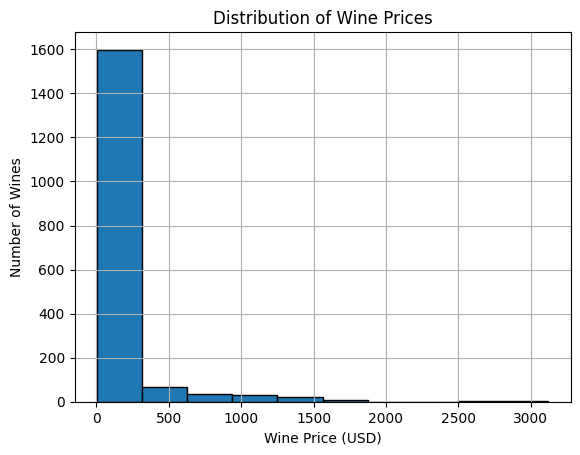

In [24]:
# Wine price distribution
ax = df['price'].hist(bins=10, edgecolor='black')

ax.set_ylabel('Number of Wines')
ax.set_xlabel('Wine Price (USD)')
ax.set_title('Distribution of Wine Prices')


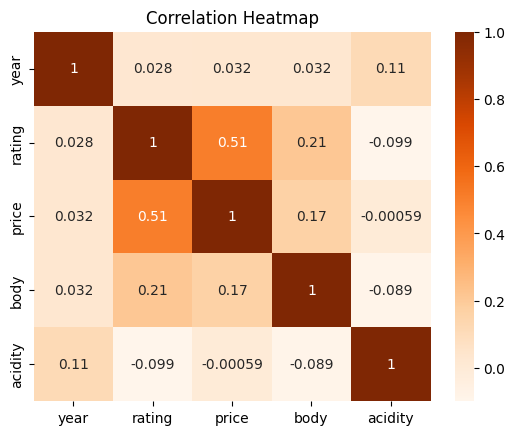

In [25]:
#Correlation heatmap of all of the numeric columns.
corr = df.corr(numeric_only=True)
ax = sns.heatmap(corr,annot=True, cmap='Oranges')
ax.set(title='Correlation Heatmap');



(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'type vs. price'}, xlabel='type', ylabel='price'>)

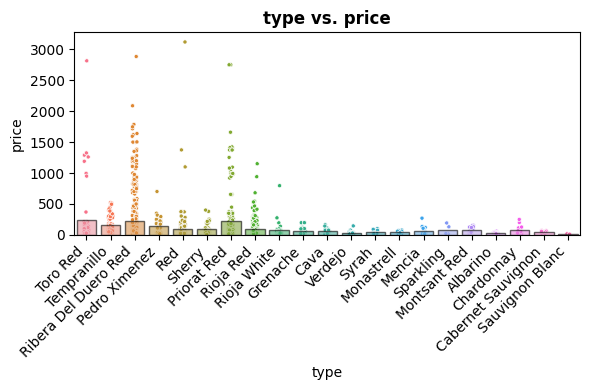

In [35]:
# First visualization
plot_categorical_vs_target(df, 'type','price')

- Visualization 1 - Wine Type by Price
- The plot shows the mean price and price variability for different wine types. Red wines have the highest average price, followed by white wines. Sparkling wines have the largest price variability as seen by the tallest error bars.

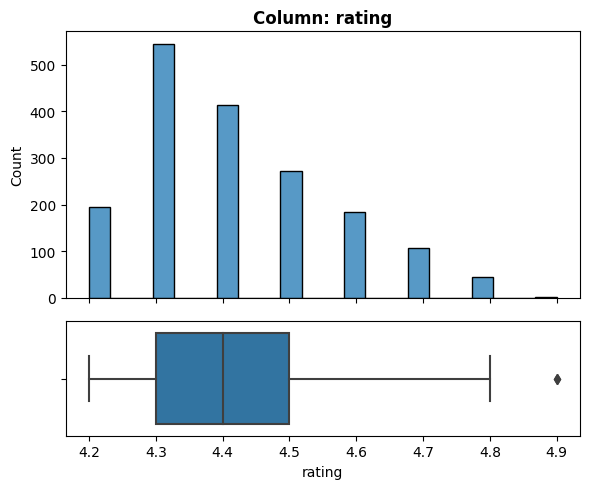

- NaN's Found: 0 (0.0%)
- Unique Values: 8
- Most common value: '4.3' occurs 544 times (30.86%)
- Not constant or quasi-constant.


In [32]:
explore_numeric(df,'rating');

- Visualization 2 - Rating
- The bar chart shows that the rating of wines are between 4.3 and 4.5. While there is some rating over or less than that, the overall trend is in between those two numbers The visualization provides an intuitive understanding that wines have been getting good ratings.